In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.keras

<module 'tensorflow.keras' from 'C:\\Users\\Ali\\.conda\\envs\\tensor_ali\\lib\\site-packages\\tensorflow\\keras\\__init__.py'>

In [3]:
keras

<module 'tensorflow.keras' from 'C:\\Users\\Ali\\.conda\\envs\\tensor_ali\\lib\\site-packages\\tensorflow\\keras\\__init__.py'>

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
#print(type(x))
print(column_names)
print(type(column_names))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
<class 'list'>


In [4]:
l1 = df.columns
l1 = l1.to_list()
print(l1)
print(type(l1))

['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']
<class 'list'>


In [5]:
df.columns = column_names
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [6]:
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
df.head(2)
df.drop(columns = {'ID'}, inplace=True)

In [7]:
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [9]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)

(30000, 23) (30000,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
print(X.shape, X.dtype)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , random_state = 42)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(27000, 23) (3000, 23)
(27000,) (3000,)


In [13]:
n_features  = X.shape[1]
n_features

23

In [66]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

"""Batch Normalization"""

Beta Initializer : initializer for beta weight

gamma Initializer : initializer for gamma weight

In [86]:
ini = tf.keras.initializers.VarianceScaling(
    scale=1.0, mode='fan_in', distribution='truncated_normal',
    seed=None)
model = Sequential()
model.add(BatchNormalization(input_shape=(n_features,)))
model.add(Dense(units=70, activation='elu', kernel_initializer=ini, input_dim=n_features))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=1, activation='sigmoid', kernel_initializer= 'glorot_uniform'))

In [87]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_58 (Batc (None, 23)                92        
_________________________________________________________________
dense_60 (Dense)             (None, 70)                1680      
_________________________________________________________________
dense_61 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_62 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_63 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_64 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_65 (Dense)             (None, 1)               

In [88]:
# compile the model
#model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy']) # Adamax(optimozor) Alternative
opt=  SGD(lr = 0.01 , momentum = 0.9)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [89]:
# fit the model
%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 ,epochs=60, batch_size=25, verbose=2)

Wall time: 0 ns
Epoch 1/60
972/972 - 4s - loss: 0.4468 - accuracy: 0.8099 - val_loss: 0.4588 - val_accuracy: 0.8067
Epoch 2/60
972/972 - 1s - loss: 0.4396 - accuracy: 0.8133 - val_loss: 0.4544 - val_accuracy: 0.8019
Epoch 3/60
972/972 - 1s - loss: 0.4374 - accuracy: 0.8173 - val_loss: 0.4576 - val_accuracy: 0.8048
Epoch 4/60
972/972 - 2s - loss: 0.4362 - accuracy: 0.8165 - val_loss: 0.4573 - val_accuracy: 0.8067
Epoch 5/60
972/972 - 2s - loss: 0.4351 - accuracy: 0.8163 - val_loss: 0.4526 - val_accuracy: 0.8052
Epoch 6/60
972/972 - 1s - loss: 0.4354 - accuracy: 0.8167 - val_loss: 0.4563 - val_accuracy: 0.8044
Epoch 7/60
972/972 - 1s - loss: 0.4344 - accuracy: 0.8170 - val_loss: 0.4513 - val_accuracy: 0.8063
Epoch 8/60
972/972 - 3s - loss: 0.4333 - accuracy: 0.8175 - val_loss: 0.4513 - val_accuracy: 0.8059
Epoch 9/60
972/972 - 1s - loss: 0.4332 - accuracy: 0.8188 - val_loss: 0.4637 - val_accuracy: 0.8070
Epoch 10/60
972/972 - 1s - loss: 0.4348 - accuracy: 0.8160 - val_loss: 0.4538 - val_

In [78]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4388 - accuracy: 0.8130
Test Accuracy: 81.30
loss is : 0.44


In [79]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [80]:
y_test.value_counts()

0    2341
1     659
Name: default payment next month, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[2232,  109],
       [ 452,  207]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , y_pred)
acc

0.813

In [83]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


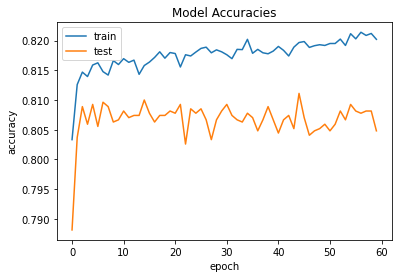

In [84]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

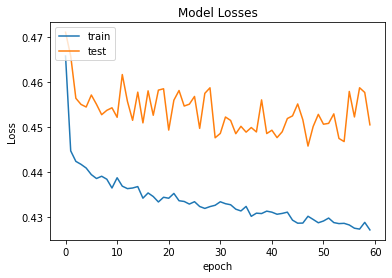

In [85]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()